# **FINAL PROJECT: 03**
### 22KDL - TEAM15


<table width="100%" style="border:0px;">
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Huỳnh Thảo Quỳnh</td>
        <td><b>MSSV:</b> 22280075</td>
    </tr>
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Lê Thanh Sang</td>
        <td><b>MSSV:</b> 22280076</td>
    </tr>
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Đinh Xuân Khang</td>
        <td><b>MSSV:</b> 22280042</td>
    </tr>
</table>


**HYPOTHESIS**: Tổng số lượt bán của từng sản phẩm bị ảnh hưởng bởi nhiều yếu tố.

**Phân tích đề bài**

**Data collection**
- Lazada:
   * thời trang: quần áo, giày dép, trang sức
   * điện tử: điện thoại, laptop, tivi
- Features cần thu thập:
  * **Type**:     danh mục
  * **Title**:    tên sản phẩm
  * **Link**
  * **Price_sale**: giá sau khi được giảm giá
  * **Sale_off**: phần trăm giảm giá
  * **Total_sold**: tổng số lượt mua
  * **Preview**: tổng số lượt đánh giá
  * **Location**: địa điểm
  * **Price_original**: giá ban đầu
  * **Ship_price**: tiền ship
  * **Return**: chính sách trả hàng
  * **Sale_rating**: phần trăm đơn hàng được đánh giá tích cực
  * **Ship_on_time**: phần trăm đơn hàng được ship đúng thời gian
  * **Chat_response**: phần trăm khả năng phản hồi của người bán
  * **One_star**: tổng số lượt đánh giá 1 sao
  * **Two_star**: tổng số lượt đánh giá 2 sao
  * **Three_star**: tổng số lượt đánh giá 3 sao
  * **Four_star**: tổng số lượt đánh giá 4 sao
  * **Five_star**: tổng số lượt đánh giá 5 sao



### **I/ Crawl data from the web (text, HTML) that is relevant to your hypothesis.**

### **II/ Use a Large Language Model (LLM) to parse this unstructured data into features.**

### **III/ Apply causal inference techniques to test your hypothesis.**

#### 3.1 Handling missing values

In [47]:
import pandas as pd
import numpy as np
from unidecode import unidecode

In [48]:
data = pd.read_csv("Final_Data_LLM.csv")
data.head(3)

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quần áo,35891,64.0,3000.0,1022.0,Hồ Chí Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quần áo,25000,50.0,907.0,241.0,Hồ Chí Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quần áo,79000,43.0,961.0,260.0,Hà Nội,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7152 entries, 0 to 7151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            7152 non-null   object 
 1   Price_sale      7152 non-null   int64  
 2   Sale_off        5306 non-null   object 
 3   Total_sold      5312 non-null   object 
 4   Preview         5435 non-null   object 
 5   Location        7152 non-null   object 
 6   Price_original  5755 non-null   float64
 7   Ship_price      5905 non-null   object 
 8   Sale_rating     6489 non-null   object 
 9   Ship_on_time    5398 non-null   float64
 10  Chat_response   6060 non-null   object 
 11  One_star        7152 non-null   float64
 12  Two_star        7152 non-null   float64
 13  Three_star      7152 non-null   float64
 14  Four_star       7152 non-null   float64
 15  Five_star       6887 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 894.1+ KB


In [50]:
print("Số quan sát bị lặp:" ,data.duplicated().sum())

Số quan sát bị lặp: 2577


In [51]:
# Bỏ các quan sát bị lặp
data.drop_duplicates(inplace=True)

In [52]:
data.isnull().sum().sort_values(ascending=False)

Sale_off          1202
Total_sold        1202
Preview           1107
Ship_on_time      1047
Price_original     845
Ship_price         765
Chat_response      690
Sale_rating        430
Five_star          196
Type                 0
Price_sale           0
Location             0
One_star             0
Two_star             0
Three_star           0
Four_star            0
dtype: int64

**Type & Location**

In [53]:
#Chuyển các cột Type và Location thành không dấu
print(data['Type'].unique(), "\n")
print(data['Location'].unique(), "\n")

['quần áo' 'giày dép' 'Trang sức' 'Trang suc' 'dien thoai' 'laptop' 'tivi'] 

['Hồ Chí Minh' 'Hà Nội' 'Nam Định' 'Nước ngoài' 'Tiền Giang' 'Cần Thơ'
 'Hà Nam' 'Trà Vinh' 'Thanh Hóa' 'Hưng Yên' 'Long An' 'Bến Tre' 'Phú Thọ'
 'Lâm Đồng' 'Đồng Nai' 'Hải Dương' 'Cà Mau' 'Bắc Giang' 'Quảng Ngãi'
 'Tây Ninh' 'Bình Định' 'Phú Yên' 'Bình Dương' 'Bắc Ninh' 'Đà Nẵng'
 'Vĩnh Phúc' 'Ho Chi Minh' 'Ha Noi' 'Hai Duong' 'Nghệ An' 'Binh Duong'
 'Hung Yen' 'Hai Phong' 'Da Nang' 'An Giang' 'Bac Ninh' 'Ben Tre'
 'Vinh Phuc' 'Nam Dinh' 'Tien Giang' 'Dak Nong' 'Thai Binh' 'Dak Lak'
 'Hanoi' 'Dong Nai' 'Thai Nguyen' 'Quang Tri' 'Thanh Hoa' 'Tay Ninh'
 'Nuoc Ngoai' 'Phu Tho' 'Nuoc ngai' 'Thua Thien Hue' 'Thái Bình'
 'Dong Thap' 'Ha Tinh' 'Phu Yen' 'Ba Ria Vung Tau' 'Bac Giang' 'Vinh Long'
 'Quang Nam'] 



In [54]:
#Chuyển cột Type
data['Type'].replace(['quần áo'], 'quan ao', inplace=True)
data['Type'].replace(['giày dép'], 'giay dep', inplace=True)
data['Type'].replace(['Trang sức', 'Trang suc'], 'trang suc', inplace=True)

In [55]:
#Hàm chuyển đổi thành không dấu
def remove_diacritics(text):
    return unidecode(text)

data['Location'] = data['Location'].apply(remove_diacritics)
data['Location'].unique()

array(['Ho Chi Minh', 'Ha Noi', 'Nam Dinh', 'Nuoc ngoai', 'Tien Giang',
       'Can Tho', 'Ha Nam', 'Tra Vinh', 'Thanh Hoa', 'Hung Yen',
       'Long An', 'Ben Tre', 'Phu Tho', 'Lam Dong', 'Dong Nai',
       'Hai Duong', 'Ca Mau', 'Bac Giang', 'Quang Ngai', 'Tay Ninh',
       'Binh Dinh', 'Phu Yen', 'Binh Duong', 'Bac Ninh', 'Da Nang',
       'Vinh Phuc', 'Nghe An', 'Hai Phong', 'An Giang', 'Dak Nong',
       'Thai Binh', 'Dak Lak', 'Hanoi', 'Thai Nguyen', 'Quang Tri',
       'Nuoc Ngoai', 'Nuoc ngai', 'Thua Thien Hue', 'Dong Thap',
       'Ha Tinh', 'Ba Ria Vung Tau', 'Vinh Long', 'Quang Nam'],
      dtype=object)

In [56]:
#Chỉnh lại dữ liệu cho đồng nhất
data['Location'].replace(['Hanoi'], 'Ha Noi', inplace=True)
data['Location'].replace(['Nuoc ngoai', 'Nuoc ngai'], 'Nuoc Ngoai', inplace=True)
data['Location'].unique()

array(['Ho Chi Minh', 'Ha Noi', 'Nam Dinh', 'Nuoc Ngoai', 'Tien Giang',
       'Can Tho', 'Ha Nam', 'Tra Vinh', 'Thanh Hoa', 'Hung Yen',
       'Long An', 'Ben Tre', 'Phu Tho', 'Lam Dong', 'Dong Nai',
       'Hai Duong', 'Ca Mau', 'Bac Giang', 'Quang Ngai', 'Tay Ninh',
       'Binh Dinh', 'Phu Yen', 'Binh Duong', 'Bac Ninh', 'Da Nang',
       'Vinh Phuc', 'Nghe An', 'Hai Phong', 'An Giang', 'Dak Nong',
       'Thai Binh', 'Dak Lak', 'Thai Nguyen', 'Quang Tri',
       'Thua Thien Hue', 'Dong Thap', 'Ha Tinh', 'Ba Ria Vung Tau',
       'Vinh Long', 'Quang Nam'], dtype=object)

**Price_Sale & Sale_off & Price_original**

In [57]:
print(data['Sale_off'].unique())

['64.0' '50.0' '43.0' '60.0' '54.0' '67.0' nan '61.0' '66.0' '53.0' '47.0'
 '45.0' '57.0' '52.0' '49.0' '44.0' '30.0' '29.0' '56.0' '59.0' '8.0'
 '35.0' '58.0' '31.0' '12.0' '51.0' '21.0' '81.0' '41.0' '96.0' '39.0'
 '40.0' '46.0' '48.0' '33.0' '15.0' '42.0' '13.0' '79.0' '76.0' '24.0'
 '7.0' '23.0' '62.0' '65.0' '32.0' '55.0' '14.0' '26.0' '70.0' '37.0'
 '82.0' '83.0' '69.0' '63.0' '34.0' '94.0' '71.0' '73.0' '18.0' '77.0'
 '16.0' '72.0' '36.0' '86.0' '85.0' '78.0' '84.0' '28.0' '38.0' '25.0'
 '97.0' '20.0' '68.0' '17.0' '89.0' '88.0' '1.0' '75.0' '74.0' '22.0'
 '80.0' '92.0' '27.0' '5.0' '10.0' '11.0' '100.0' '6.0' '19.0' '9.0'
 '99.0' '98.0' '93.0' '7' '10' '16' '6' '15' '11' '12' '17' '8' '13' '27'
 '22' '29' '18' '9' '14' '31' '42' '35' '34' '25' '20' '26' '23' '19' '52'
 '21' '1' '24' '60' '5' '32' '3' '37' '40' '46' '28' '30' '45' '36' '38'
 '33' '41' '39' '2' '4' '1200' 'none' '0' '3.0' '4.0' '2.0' '1.1' '0.0']


In [58]:
data['Sale_off'] = data['Sale_off'].replace("none", None)

#Chuyển đổi float cho Sale_off & Price_sale
data['Sale_off'] = data['Sale_off'].astype(float)
data['Price_sale'] = data['Price_sale'].astype(float)

#Check null cho cột Sale_off
data['Sale_off'].isnull().sum()

1204

In [59]:
# Xoá dữ liệu cột Sale_off >= 100
indices_to_drop = data.loc[data['Sale_off'] >= 100].index
print(indices_to_drop)
data = data.drop(indices_to_drop)

Int64Index([2040, 4158], dtype='int64')


In [60]:
# Tính toán giá trị vào NaN
#TH1: Price_original == NULL, Sale_off != NULL
data['Price_original'].fillna(data['Price_sale'] / (1 - data['Sale_off'] / 100), inplace=True)

#TH2: Sale_off == NULL,  Price_original != NULL
data['Sale_off'].fillna(((data['Price_original'] - data['Price_sale']) / data['Price_original']) * 100, inplace=True)

#TH3: Sale_off & Price_original == NULL
data['Sale_off'].fillna(0, inplace=True)
data['Price_original'].fillna(data['Price_sale'], inplace=True)

In [61]:
# Xoá hàng giá gốc < giá sale
data = data[data['Price_original'] >= data['Price_sale']]
data.head()

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quan ao,35891.0,64.0,3000.0,1022.0,Ho Chi Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quan ao,25000.0,50.0,907.0,241.0,Ho Chi Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quan ao,79000.0,43.0,961.0,260.0,Ha Noi,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0
3,quan ao,36000.0,60.0,102.0,21.0,Nam Dinh,189000.0,37700.0,94.0,100.0,83.0,1.0,0.0,1.0,1.0,18.0
4,quan ao,15971.0,54.0,219.0,68.0,Ha Noi,59000.0,32700.0,95.0,100.0,100.0,0.0,1.0,0.0,3.0,65.0


**Total_sold & Preview & Ship_price & Sale_rating & Ship_on_time & Chat_response**

In [62]:
#Gán 0 cho 'Total_sold', 'Preview'
data['Total_sold'] = pd.to_numeric(data['Total_sold'], errors='coerce').fillna(0).astype(float)
data['Preview'] = pd.to_numeric(data["Preview"], errors='coerce').fillna(0).astype(float)

In [63]:
#Ship_price
data['Ship_price'] = pd.to_numeric(data['Ship_price'], errors='coerce').fillna(0).astype(int)
data['Ship_price'].unique()

array([   16500,    32700,    37700,    18300,        0,    17000,
          28700,    38000,    51100,    27000,    32200,    15500,
          45100,    44100,    19600,    43900,    23500,    27300,
          12200,      700,     8000,    20300,    57700,     7300,
           6000,    20100,    22700,    21500,    56800,    51500,
          20700,    40100,    23900,    40300,   635900,    21700,
           5500,   202600,   110800,    19000,  1928000,    26100,
          13700,    64800,    73600,    10200,      100,       98,
          84600,   198200,   744000,    21200,    65500,     9700,
          23800,    70000,    52400,    80200,   104900,       97,
          74400,     1200,    74700,       95,   100600,   118500,
          55400,    12800,    48200,    90700,    63300,    52300,
          90400,    34100,    64700,    13800,   494000,    63400,
        2695100,    16300,       90,    62600,   115100,     9100,
          90600,    63700,    30900,    94800,    32500,      

In [64]:
#Ship_on_time: chuyển sang int rồi fill NaN = median
data['Ship_on_time'] = pd.to_numeric(data['Ship_on_time'], errors='coerce').fillna(0).astype(int)
median_Ship_on_time = data['Ship_on_time'].median()
data['Ship_on_time'] = data['Ship_on_time'].replace([0], int(median_Ship_on_time))

data['Ship_on_time'].unique()

array([100,  99,  96,  98,  93,  97,  91,  87,  84,  92,  95,  83,  80,
        63,  86,  67,  28,  82,  85,  94,  60,  88,   3,  79,  89,  74,
        33,  90,  41,  81,  76,  29,  71,  66,  25,  13,  50,  72,  75,
        44,  70,  68,  57,  55,  78,  14,  20,  37,  65,  77,  40])

In [65]:
#Sale_rating: chuyển sang int rồi fill NaN = median
data['Sale_rating'] = pd.to_numeric(data['Sale_rating'], errors='coerce').fillna(0).astype(int)
median_Sale_rating = data['Sale_rating'].median()
data['Sale_rating'] = data['Sale_rating'].replace([0], int(median_Sale_rating))

data['Sale_rating'].unique()

array([ 97,  91,  92,  94,  95,  99,  88,  98,  93,  96,  86,  85,  69,
        90,  87,  89,  83,  62,  64,  84, 100,  78,  66,  68,  65,  77,
        76,  71,  74,  75,  73,  81,  60,  80,  40,  79,  82,  67])

In [66]:
#Chat_respone: chuyển sang int rồi fill NaN = median
data['Chat_response'] = pd.to_numeric(data['Chat_response'], errors='coerce').fillna(0).astype(int)
median_Chat_response = data['Chat_response'].median()
data['Chat_response'] = data['Chat_response'].replace([0], int(median_Chat_response))

data['Chat_response'].unique()

array([100,  50,  33,  83,  97,  60,  66,  90,  81,  99,  54,  42,  91,
        82,  96,  34,  69,  64,  80,  58,  94,  98,  87,  85,  57,  86,
        75,  63,  79,  71,  88,  92,  56,  77,  84,  93,  95,  72,  46,
        73,  78,  44,  76,  40,  70,  62,  53,  36,   6,  13,  89,  37,
         1,  55,  65,  52])

**Five_star**

In [67]:
#Loại bỏ những giá trị Null của cột Five_star
data = data.dropna(subset=['Five_star'])

In [68]:
#Check NULL
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 0 to 7151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            4363 non-null   object 
 1   Price_sale      4363 non-null   float64
 2   Sale_off        4363 non-null   float64
 3   Total_sold      4363 non-null   float64
 4   Preview         4363 non-null   float64
 5   Location        4363 non-null   object 
 6   Price_original  4363 non-null   float64
 7   Ship_price      4363 non-null   int32  
 8   Sale_rating     4363 non-null   int32  
 9   Ship_on_time    4363 non-null   int32  
 10  Chat_response   4363 non-null   int32  
 11  One_star        4363 non-null   float64
 12  Two_star        4363 non-null   float64
 13  Three_star      4363 non-null   float64
 14  Four_star       4363 non-null   float64
 15  Five_star       4363 non-null   float64
dtypes: float64(10), int32(4), object(2)
memory usage: 511.3+ KB


In [69]:
data

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quan ao,35891.0,64.000000,3000.0,1022.0,Ho Chi Minh,100000.0,16500,97,100,100,20.0,7.0,27.0,36.0,932.0
1,quan ao,25000.0,50.000000,907.0,241.0,Ho Chi Minh,71998.0,16500,91,100,50,5.0,2.0,6.0,7.0,222.0
2,quan ao,79000.0,43.000000,961.0,260.0,Ha Noi,139000.0,32700,92,99,33,11.0,8.0,8.0,16.0,218.0
3,quan ao,36000.0,60.000000,102.0,21.0,Nam Dinh,189000.0,37700,94,100,83,1.0,0.0,1.0,1.0,18.0
4,quan ao,15971.0,54.000000,219.0,68.0,Ha Noi,59000.0,32700,95,100,100,0.0,1.0,0.0,3.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,tivi,1000000.0,0.000000,0.0,0.0,Dong Nai,1000000.0,74700,96,98,97,0.0,0.0,0.0,0.0,0.0
7146,tivi,1500000.0,5.063291,0.0,1.0,Ha Noi,1580000.0,198200,91,90,96,0.0,0.0,0.0,0.0,1.0
7149,tivi,6150000.0,38.438438,0.0,0.0,Ho Chi Minh,9990000.0,0,97,98,89,0.0,0.0,0.0,0.0,0.0
7150,tivi,4250000.0,14.829659,0.0,0.0,Ha Noi,4990000.0,135500,100,40,97,0.0,0.0,0.0,0.0,0.0


In [70]:
data['Type'].unique()

array(['quan ao', 'giay dep', 'trang suc', 'dien thoai', 'laptop', 'tivi'],
      dtype=object)

In [71]:
# Cột cần chuyển
column_name = 'Total_sold'

# Pop cột ra khỏi DataFrame
column = data.pop(column_name)

# Chèn cột vào vị trí cuối cùng
data[column_name] = column

data.head()

,Type,Price_sale,Sale_off,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star,Total_sold
0,quan ao,35891.0,64.0,1022.0,Ho Chi Minh,100000.0,16500,97,100,100,20.0,7.0,27.0,36.0,932.0,3000.0
1,quan ao,25000.0,50.0,241.0,Ho Chi Minh,71998.0,16500,91,100,50,5.0,2.0,6.0,7.0,222.0,907.0
2,quan ao,79000.0,43.0,260.0,Ha Noi,139000.0,32700,92,99,33,11.0,8.0,8.0,16.0,218.0,961.0
3,quan ao,36000.0,60.0,21.0,Nam Dinh,189000.0,37700,94,100,83,1.0,0.0,1.0,1.0,18.0,102.0
4,quan ao,15971.0,54.0,68.0,Ha Noi,59000.0,32700,95,100,100,0.0,1.0,0.0,3.0,65.0,219.0


In [72]:
# Sắp xếp lại DataFrame một cách ngẫu nhiên
data = data.sample(frac=1).reset_index(drop=True)

In [73]:
data.head()

,Type,Price_sale,Sale_off,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star,Total_sold
0,tivi,2777000.0,44.0000,118.0,Ho Chi Minh,4990000.0,0,97,98,84,0.0,1.0,1.0,1.0,116.0,319.0
1,trang suc,29432.0,54.0125,16.0,Nuoc Ngoai,64000.0,17000,96,89,100,1.0,0.0,0.0,0.0,15.0,43.0
2,laptop,899999.0,10.0000,4.0,Hung Yen,999999.0,100600,86,100,88,1.0,0.0,0.0,0.0,4.0,11.0
3,giay dep,81000.0,50.0000,390.0,Nuoc Ngoai,161600.0,0,98,98,100,4.0,0.0,2.0,10.0,374.0,790.0
4,tivi,3709000.0,38.0000,3.0,Ho Chi Minh,6000000.0,0,98,100,99,0.0,0.0,0.0,0.0,3.0,10.0


#### 3.2 Encoding categorical variables

In [74]:
new_data = data.copy()

In [75]:
#Assign labels to 2 columns: Type và Location
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
new_data['Type'] = label_encoder.fit_transform(new_data['Type'])

new_data['Location'] = label_encoder.fit_transform(new_data['Location'])

In [76]:
#See the type of labeled categories
print(data['Type'].unique(), "\n")
print(new_data['Type'].unique(), "\n")

print(data['Location'].unique(), "\n")
print(new_data['Location'].unique(), "\n")

['tivi' 'trang suc' 'laptop' 'giay dep' 'quan ao' 'dien thoai'] 

[4 5 2 1 3 0] 

['Ho Chi Minh' 'Nuoc Ngoai' 'Hung Yen' 'Ha Noi' 'Nghe An' 'Dong Nai'
 'Da Nang' 'Tien Giang' 'Thanh Hoa' 'Nam Dinh' 'Binh Duong' 'Vinh Phuc'
 'Bac Ninh' 'Long An' 'Hai Duong' 'Ben Tre' 'Dong Thap' 'Binh Dinh'
 'Quang Tri' 'Hai Phong' 'Thai Binh' 'Bac Giang' 'Lam Dong'
 'Ba Ria Vung Tau' 'An Giang' 'Can Tho' 'Ca Mau' 'Dak Nong' 'Tra Vinh'
 'Dak Lak' 'Phu Tho' 'Quang Nam' 'Ha Tinh' 'Tay Ninh' 'Vinh Long' 'Ha Nam'
 'Thai Nguyen' 'Thua Thien Hue' 'Quang Ngai' 'Phu Yen'] 

[19 25 20 15 24 12  9 36 34 23  6 39  3 22 17  4 13  5 30 18 32  2 21  1
  0  8  7 11 37 10 26 28 16 31 38 14 33 35 29 27] 



In [77]:
# Change type -> category
new_data['Type'] = new_data['Type'].astype('category')
new_data['Location'] = new_data['Location'].astype('category')

In [78]:
data['Type'].value_counts()

dien thoai    838
quan ao       772
trang suc     728
laptop        691
tivi          685
giay dep      649
Name: Type, dtype: int64

# EDA

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

Biểu đồ thể hiện khả năng tương quan giữa các biến 

C:\Users\Admin\AppData\Local\Temp\ipykernel_21308\2885379862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot=True, cmap='Blues')


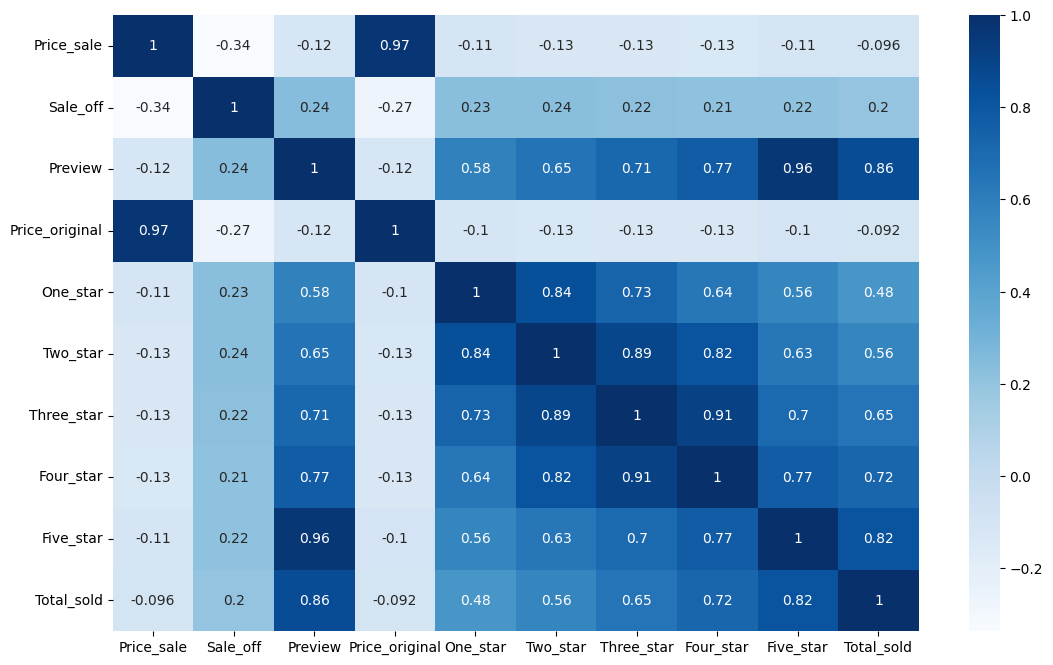

In [106]:
plt.figure(figsize=(13,8))
sns.heatmap(new_data.corr(), annot=True, cmap='Blues')
plt.show()

Lọc bỏ 4 feature Ship_price, Sale_rating, Ship_on_time, Chat_response do mối tương quan với Total_sold thấp

In [81]:
columns_drop = ['Ship_price', 'Sale_rating', 'Ship_on_time', 'Chat_response']
new_data.drop(columns=columns_drop, inplace=True)

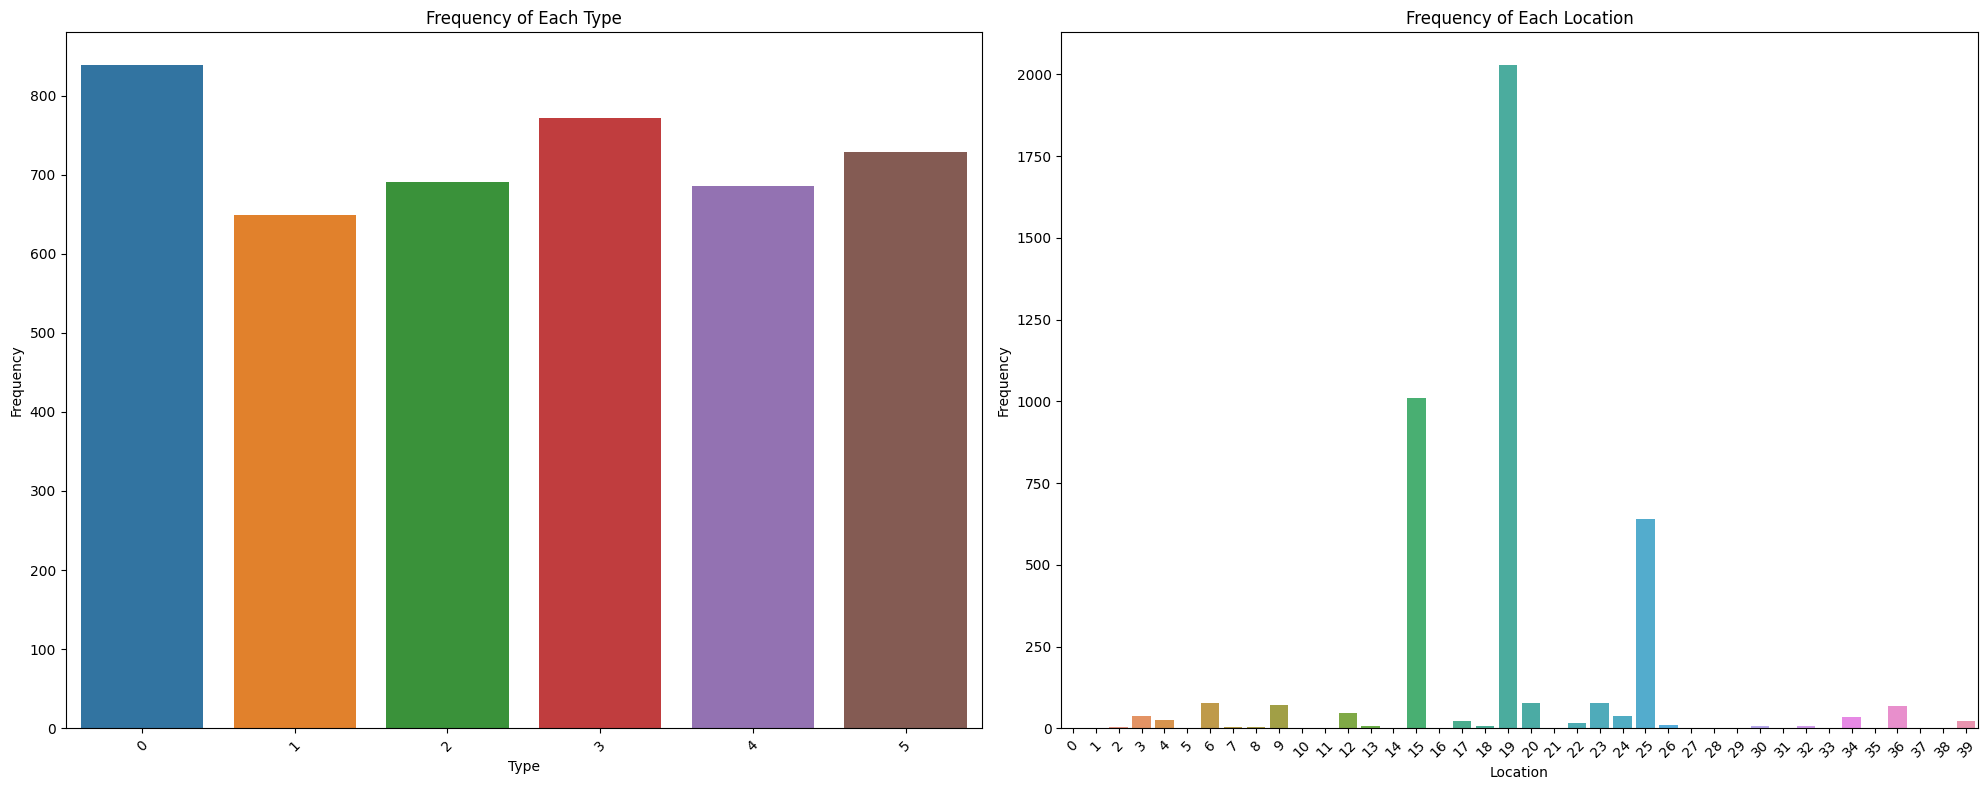

In [82]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for 'Type'
sns.countplot(ax=axes[0], x='Type', data=new_data)
axes[0].set_title('Frequency of Each Type')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for 'Location'
sns.countplot(ax=axes[1], x='Location', data=new_data)
axes[1].set_title('Frequency of Each Location')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Cột Location có một số dữ liệu chiếm ưu thế hơn các dữ liệu khác. Việc này có thể liên quan đến hiệu quả của model nên ta có thể drop đi cột Location

In [83]:
new_data.drop(columns='Location', inplace=True)
new_data

,Type,Price_sale,Sale_off,Preview,Price_original,One_star,Two_star,Three_star,Four_star,Five_star,Total_sold
0,4,2777000.0,44.000000,118.0,4.990000e+06,0.0,1.0,1.0,1.0,116.0,319.0
1,5,29432.0,54.012500,16.0,6.400000e+04,1.0,0.0,0.0,0.0,15.0,43.0
2,2,899999.0,10.000000,4.0,9.999990e+05,1.0,0.0,0.0,0.0,4.0,11.0
3,1,81000.0,50.000000,390.0,1.616000e+05,4.0,0.0,2.0,10.0,374.0,790.0
4,4,3709000.0,38.000000,3.0,6.000000e+06,0.0,0.0,0.0,0.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
4358,1,31280.0,11.000000,3.0,3.514607e+04,0.0,0.0,0.0,0.0,0.0,11.0
4359,5,11474.0,63.000000,20.0,3.070000e+04,0.0,0.0,0.0,3.0,17.0,66.0
4360,4,8589000.0,33.000000,234.0,1.290000e+07,1.0,0.0,0.0,1.0,232.0,1000.0
4361,1,72000.0,35.000000,1163.0,1.100000e+05,33.0,9.0,39.0,58.0,1023.0,3700.0


#### 3.3 Normalize the numerical feature

In [84]:
#Split data into features (X) and the target variable (Y): Total_sold
X = new_data.drop(columns=['Total_sold'])
y = new_data['Total_sold']

#Scale X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Convert data to dataframe
col = X.columns
X_std = pd.DataFrame(X_sc, columns=col)

# Linear Regression

In [85]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2)

In [86]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

LinearRegression()

In [87]:
train_pred = model_regression.predict(X_train)
test_pred = model_regression.predict(X_test)

In [88]:
# Show metrics evaluate the performance of model 
from sklearn import metrics

print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  712134.0695821203
>> Train MAE:  206.1656830720267
>> Train R2-Score:  0.735138955709115
-----------------------Test-----------------------
>> Test MSE:  228550.6276326695
>> Test MAE:  184.58449547066874
>> Test R2-Score:  0.8370236012803872


In [89]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(estimator=model_regression, X=X_std, y=y, cv=5)
print(score)
print(score.mean())

[0.836476   0.88415571 0.76134248 0.61553046 0.68816141]
0.7571332124611171


In [90]:
model_regression.coef_

array([  61.28178832,  -19.38199566,  -27.74946834, 1344.3498845 ,
         49.70428384,  -58.6131428 , -197.96916237,   -8.01985583,
        450.71010517, -145.16459433])

In [91]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [92]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

In [93]:
# Show metrics evaluate the performance of model 
from sklearn import metrics

print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  712137.6051292481
>> Train MAE:  206.02211414855248
>> Train R2-Score:  0.7351376407478677
-----------------------Test-----------------------
>> Test MSE:  228217.34912621407
>> Test MAE:  184.37174729743938
>> Test R2-Score:  0.8372612577301435


In [94]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [95]:
train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

In [96]:
# Show metrics evaluate the performance of model 
from sklearn import metrics

print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  712253.7315037866
>> Train MAE:  204.54983534064698
>> Train R2-Score:  0.7350944503513627
-----------------------Test-----------------------
>> Test MSE:  225951.69161543561
>> Test MAE:  182.75524456213253
>> Test R2-Score:  0.8388768678278422


# Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)

In [99]:
# Show metrics evaluate the performance of model 
from sklearn import metrics

print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  86307.19939123775
>> Train MAE:  43.180743751124055
>> Train R2-Score:  0.9679001245172855
-----------------------Test-----------------------
>> Test MSE:  125629.16817862127
>> Test MAE:  91.62696417318838
>> Test R2-Score:  0.9104155188022525


In [100]:
score = cross_val_score(estimator=RFR, X=X_std, y=y, cv=5)
print(score)
print(score.mean())

[0.9256409  0.90637593 0.81757935 0.59811881 0.75868224]
0.8012794451590336


# Gradient Boosting


In [101]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [102]:
train_pred = GBR.predict(X_train)
test_pred = GBR.predict(X_test)

In [103]:
# Show metrics evaluate the performance of model 
from sklearn import metrics

print("Train".center(50, '-'))
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))

print("Test".center(50, '-'))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

----------------------Train-----------------------
>> Train MSE:  43374.04690987794
>> Train MAE:  78.78206860063065
>> Train R2-Score:  0.9838680722487926
-----------------------Test-----------------------
>> Test MSE:  208644.89000069062
>> Test MAE:  118.90444518563098
>> Test R2-Score:  0.8512181168094868
